In [1]:
%%bash
git branch -v 

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
* assembias f5918b5 Made the behavior of the slope parameter to be log, for smoother emulation
  master    2fa2673 small tweaks made with plotting stuff.


In [2]:
from pearce.emulator import OriginalRecipe, ExtraCrispy, SpicyBuffalo
from pearce.emulator import parameter, DEFAULT_PARAMS as PARAMS

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [4]:
training_dir = '/u/ki/swmclau2/des/PearceLHC_wp_z/'
fiducial_params = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987, 7.29722764, \
           10.24533859,  14.38449888,  20.1958975 , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2

In [5]:
y_param = 'logMmin'
emulation_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233), ('z', 0.5)]
em_params = dict(emulation_point)
try:
    del em_params[y_param]
except KeyError:
    pass

In [6]:
or_params = PARAMS[:]
or_params.append(parameter('z', 0.0, 0.5))
or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r

In [7]:
y_param_idx = -1
for idx, p in enumerate(or_params):
    if p.name==y_param:
        y_param_idx = idx
        break
        
y_vals = np.linspace(or_params[y_param_idx].low, or_params[y_param_idx].high, 4)
em_params[y_param] = y_vals

In [8]:
print em_params[y_param]

[ 11.7         11.96666667  12.23333333  12.5       ]


In [9]:
print em_params

{'logMmin': array([ 11.7       ,  11.96666667,  12.23333333,  12.5       ]), 'f_c': 0.233, 'logM0': 12.0, 'sigma_logM': 0.533, 'logM1': 13.5, 'alpha': 1.083, 'z': 0.5}


In [10]:
emu1 = OriginalRecipe(training_dir,params=or_params)

Loading training data...
Done.
Building emulator...
Done.


In [11]:
rpoints = np.logspace(np.log10(rbins[1]), np.log10(rbins[-2]), 50)

In [12]:
log_xi_pred, log_xi_err = emu1.emulate_wrt_r(em_params, rpoints, gp_errs = True)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
#log_xi_err = np.zeros_like(log_xi_pred)

{'logMmin': array([ 11.7       ,  11.96666667,  12.23333333,  12.5       ]), 'r': array([-0.90526317, -0.85714287, -0.80902257, -0.76090227, -0.71278197,
       -0.66466167, -0.61654136, -0.56842106, -0.52030076, -0.47218046,
       -0.42406016, -0.37593986, -0.32781956, -0.27969926, -0.23157896,
       -0.18345866, -0.13533835, -0.08721805, -0.03909775,  0.00902255,
        0.05714285,  0.10526315,  0.15338345,  0.20150375,  0.24962405,
        0.29774435,  0.34586466,  0.39398496,  0.44210526,  0.49022556,
        0.53834586,  0.58646616,  0.63458646,  0.68270676,  0.73082706,
        0.77894736,  0.82706767,  0.87518797,  0.92330827,  0.97142857,
        1.01954887,  1.06766917,  1.11578947,  1.16390977,  1.21203007,
        1.26015037,  1.30827068,  1.35639098,  1.40451128,  1.45263158]), 'f_c': 0.233, 'logM0': 12.0, 'logM1': 13.5, 'alpha': 1.083, 'z': array([ 0.5]), 'sigma_logM': 0.533}
t (200, 8)
[ 11.7          0.533       12.          13.5          1.083        0.233
   0.5    

In [13]:
print log_xi_err

[[  6.28445706e-05   6.13129589e-05   5.97413752e-05   5.87664915e-05
    5.83275057e-05   5.81453597e-05   5.80178167e-05   5.78772484e-05
    5.77324040e-05   5.76044410e-05   5.74997350e-05   5.74121569e-05
    5.73336330e-05   5.72600379e-05   5.71909793e-05   5.71272876e-05
    5.70693055e-05   5.70165934e-05   5.69683304e-05   5.69237711e-05
    5.68825935e-05   5.68451274e-05   5.68123528e-05   5.67855563e-05
    5.67657447e-05   5.67531296e-05   5.67469968e-05   5.67460534e-05
    5.67490682e-05   5.67554788e-05   5.67656759e-05   5.67808408e-05
    5.68024425e-05   5.68316958e-05   5.68693441e-05   5.69159609e-05
    5.69726082e-05   5.70413923e-05   5.71255196e-05   5.72289242e-05
    5.73560323e-05   5.75122270e-05   5.77051023e-05   5.79464363e-05
    5.82556680e-05   5.86664967e-05   5.92362442e-05   6.00530042e-05
    6.12419380e-05   6.30274181e-05]
 [  5.97834092e-05   5.85541289e-05   5.73918073e-05   5.67635866e-05
    5.65515599e-05   5.65012574e-05   5.64581750e-05 

In [14]:
print log_xi_pred.shape

(4, 50)


In [15]:
print em_params

{'logMmin': array([ 11.7       ,  11.96666667,  12.23333333,  12.5       ]), 'f_c': 0.233, 'logM0': 12.0, 'sigma_logM': 0.533, 'logM1': 13.5, 'alpha': 1.083, 'z': 0.5}


In [16]:
truth_dir = '/u/ki/swmclau2/des/PearceFHC_wp_z/'
plot_r, plot_xi, plot_xi_err = emu1.get_plot_data(em_params,truth_dir, independent_variable=None)

In [17]:
plot_xi.shape, plot_r.shape, plot_xi_err.shape

((136,), (136,), (136,))

In [18]:
plot_xi = plot_xi.reshape((log_xi_pred.shape[0], -1))
plot_r = plot_r.reshape((log_xi_pred.shape[0], -1))
plot_xi_err = plot_xi_err.reshape((log_xi_pred.shape[0], -1))

In [19]:
plot_xi.shape

(4, 34)

In [20]:
#seems like there's a bug in plot_xi that returns all redshifts. Cutting..
plot_xi = plot_xi[:, plot_xi.shape[1]/2.0:]
plot_r = plot_r[:, plot_r.shape[1]/2.0:]
plot_xi_err = plot_xi_err[:, plot_xi_err.shape[1]/2.0:]

/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [21]:
plot_xi.shape

(4, 17)

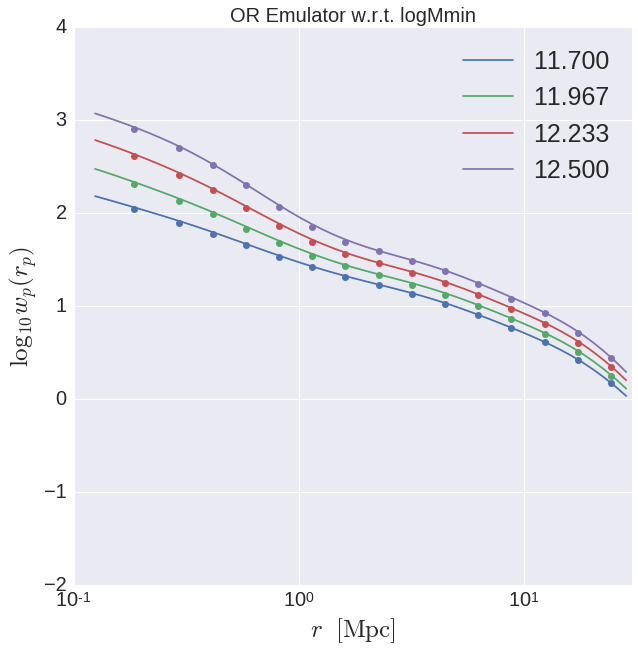

In [22]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,pr, px, err,c in zip(y_vals, log_xi_pred, log_xi_err ,plot_r, plot_xi,plot_xi_err,colors):

    plt.plot(rpoints, lxp,label = '%.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

    plt.errorbar(10**pr, px,err, color =c,fmt = 'o')


plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = -2, ymax = 4)
plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

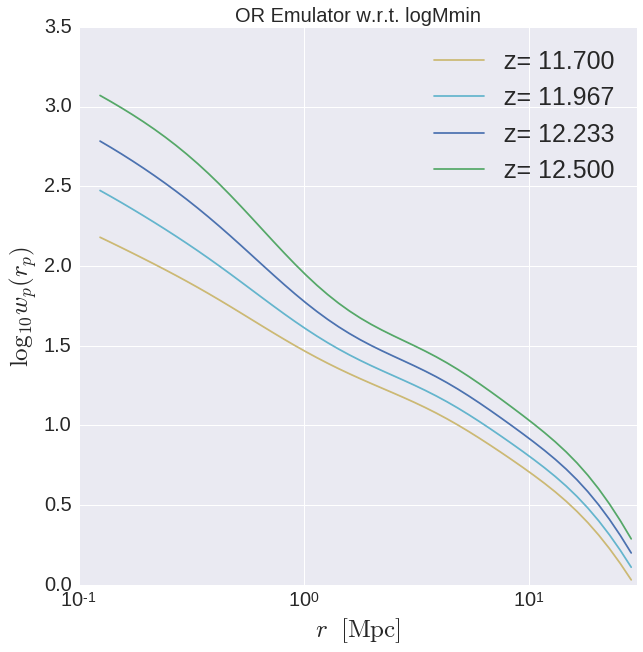

In [23]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [24]:
emu2 = ExtraCrispy(training_dir)#no r in params

Loading training data...
Done.
Building emulator...
Done.


In [20]:
rpoints = emu2.scale_bin_centers
em_params['z'] = np.array([emu2.redshift_bin_centers[0]])

In [21]:
log_xi_pred = emu2.emulate_wrt_r(em_params,rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#print log_xi_pred
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros(log_xi_pred.shape)

1 (4, 2, 17)
t
[[ 11.7          0.533       12.          13.5          1.083        0.233     ]
 [ 11.96666667   0.533       12.          13.5          1.083        0.233     ]
 [ 12.23333333   0.533       12.          13.5          1.083        0.233     ]
 [ 12.5          0.533       12.          13.5          1.083        0.233     ]]

[[[  2.24385567e+00   2.04064525e+00   1.89621578e+00   1.77537928e+00
     1.65111440e+00   1.52687692e+00   1.41354181e+00   1.31364831e+00
     1.22286138e+00   1.12608270e+00   1.01937743e+00   9.00500924e-01
     7.58309679e-01   6.06194280e-01   4.17840068e-01   1.70677134e-01
    -1.59808502e-01]
  [  2.49590678e+00   2.30321911e+00   2.14930385e+00   2.02431463e+00
     1.88470440e+00   1.72720402e+00   1.57703229e+00   1.44606289e+00
     1.33722782e+00   1.23548170e+00   1.13284795e+00   1.00246046e+00
     8.62587531e-01   7.13315957e-01   5.14078446e-01   2.74465067e-01
    -6.55154014e-02]]

 [[  2.54400925e+00   2.31111091e+00   2.134160

In [22]:
print log_xi_pred

[[  2.24385567e+00   2.04064525e+00   1.89621578e+00   1.77537928e+00
    1.65111440e+00   1.52687692e+00   1.41354181e+00   1.31364831e+00
    1.22286138e+00   1.12608270e+00   1.01937743e+00   9.00500924e-01
    7.58309679e-01   6.06194280e-01   4.17840068e-01   1.70677134e-01
   -1.59808502e-01]
 [  2.54400925e+00   2.31111091e+00   2.13416048e+00   1.98973362e+00
    1.83416440e+00   1.68436044e+00   1.54586169e+00   1.42986664e+00
    1.33559976e+00   1.23198974e+00   1.12650164e+00   1.00384077e+00
    8.57852507e-01   7.05082932e-01   5.08857491e-01   2.50433102e-01
   -8.74175131e-02]
 [  2.85335675e+00   2.60866551e+00   2.40791740e+00   2.23908984e+00
    2.05011673e+00   1.86328933e+00   1.69352755e+00   1.56048367e+00
    1.46094124e+00   1.35259322e+00   1.24638006e+00   1.11813140e+00
    9.67979105e-01   8.13338542e-01   6.11256219e-01   3.44095236e-01
   -2.84528253e-03]
 [  3.14323471e+00   2.89942981e+00   2.69358442e+00   2.50842370e+00
    2.29027847e+00   2.0597648

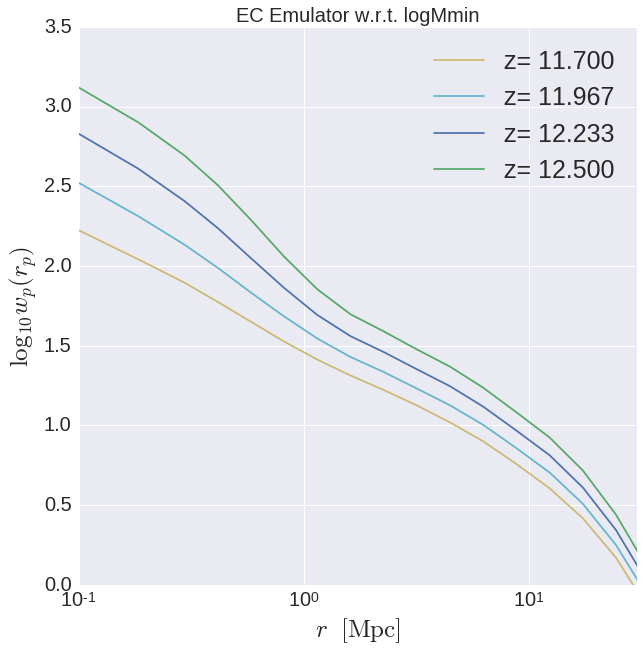

In [23]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    #plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )
    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("EC Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [25]:
or_params = PARAMS[:]
or_params.append(parameter('z', 0.0, 0.5))
#or_params.append(parameter('r', 0, 1)) #95% sure bounds aren't used for r
emu3 = SpicyBuffalo(training_dir, em_param = 'z', params = or_params)#no r in params

Loading training data...
Done.
Building emulator...
Done.


In [26]:
print len(emu3.emulators)
print emu3.em_bin_centers

17
[  0.0937359    0.18477483   0.29469917   0.41375889   0.58091924
   0.81561308   1.14512422   1.60775928   2.25730085   3.16925998
   4.44965447   6.24733375   8.77128311  12.31491873  17.29019819
  24.27551166  34.08292144]


In [27]:
print em_params['z']

0.5


In [28]:
log_xi_pred = emu3.emulate_wrt_r(em_params,rpoints)
#log_xi_cov = np.zeros((log_xi_pred.shape[0], log_xi_pred.shape[0]))
#log_xi_err = np.sqrt(np.diag(log_xi_cov))
#print log_xi_pred
#log_xi_pred = log_xi_pred.reshape((-1, len(rpoints)))
#log_xi_err = log_xi_err.reshape((-1, len(rpoints)))
log_xi_err = np.zeros(log_xi_pred.shape)

t (4, 7)
[ 11.7     0.533  12.     13.5     1.083   0.233   0.5  ]


In [29]:
print log_xi_pred.shape

(4, 50)


In [30]:
print log_xi_pred[0, :]

[ 2.18505836  2.15238176  2.11880267  2.08460552  2.05007243  2.01542194
  1.98070477  1.94563465  1.90932655  1.87078158  1.83032139  1.78882715
  1.74732565  1.70608985  1.66489399  1.62328944  1.58171086  1.54090503
  1.50162549  1.46424266  1.42858266  1.3939522   1.36046371  1.32840322
  1.29774676  1.26824923  1.23903778  1.20841242  1.17598523  1.14239787
  1.10860994  1.07486894  1.04054391  1.00429162  0.96541045  0.92390987
  0.87987342  0.8335981   0.78568236  0.73700872  0.68785407  0.63732579
  0.58343842  0.524558    0.46021655  0.38994516  0.31318253  0.22922145
  0.13713516  0.03565908]


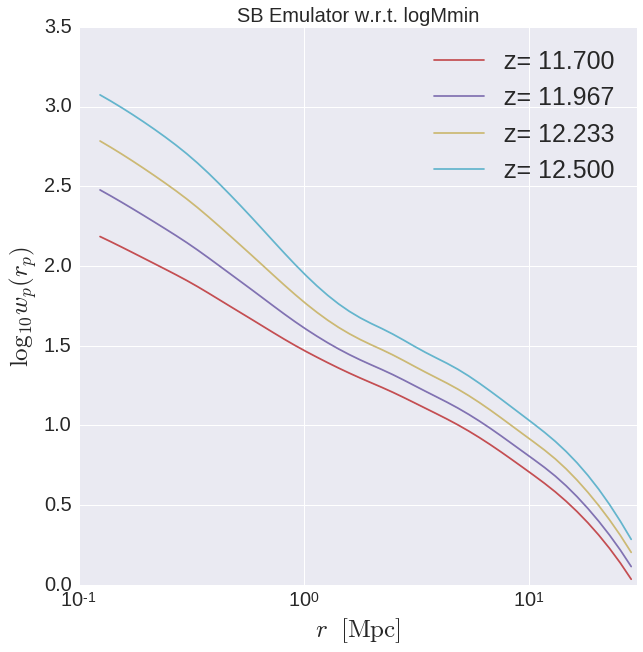

In [31]:
fig = plt.figure(figsize = (10, 10))
for label, lxp, lxe,c in zip(y_vals, log_xi_pred, log_xi_err ,colors):

    #plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )
    plt.plot(rpoints, lxp,label = 'z= %.3f'%label, color = c )

    plt.fill_between(rpoints,lxp+lxe,
                     lxp-lxe, color = c, alpha = 0.3)

plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 0, ymax = 3.5)
plt.title("SB Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\log_{10}{w_p(r_p) }$', fontsize=25)
plt.legend(loc='best', fontsize=25)

In [32]:
emu1.x.shape

(17000, 8)

In [33]:
emu1.x[:34,-2:]

array([[ 0.51975684, -1.02809405],
       [ 0.51975684, -0.73335719],
       [ 0.51975684, -0.53062108],
       [ 0.51975684, -0.38325266],
       [ 0.51975684, -0.23588424],
       [ 0.51975684, -0.08851582],
       [ 0.51975684,  0.0588526 ],
       [ 0.51975684,  0.20622102],
       [ 0.51975684,  0.35358945],
       [ 0.51975684,  0.50095787],
       [ 0.51975684,  0.64832629],
       [ 0.51975684,  0.79569471],
       [ 0.51975684,  0.94306313],
       [ 0.51975684,  1.09043155],
       [ 0.51975684,  1.23779997],
       [ 0.51975684,  1.38516839],
       [ 0.51975684,  1.53253681],
       [ 0.51975684, -1.02809405],
       [ 0.51975684, -0.73335719],
       [ 0.51975684, -0.53062108],
       [ 0.51975684, -0.38325266],
       [ 0.51975684, -0.23588424],
       [ 0.51975684, -0.08851582],
       [ 0.51975684,  0.0588526 ],
       [ 0.51975684,  0.20622102],
       [ 0.51975684,  0.35358945],
       [ 0.51975684,  0.50095787],
       [ 0.51975684,  0.64832629],
       [ 0.51975684,

In [34]:
emu1.y.shape

(17000,)

In [35]:
emu2.y.shape

(500, 2, 17)

In [36]:
idx1, idx2 = 0,0

In [37]:
print emu1.x[idx1,-1]
print emu1.x[idx2*len(emu1.x)/2, -2]

-1.0280940464
0.519756838906


In [38]:
ec_col = emu2.y[:,idx2, idx1 ]
or_col = emu1.y[np.logical_and(emu1.x[:, -1]==emu1.x[idx1,-1], emu1.x[:, -2] == emu1.x[idx2*len(emu1.x)/2, -2] ) ]

In [39]:
print or_col.shape
print ec_col.shape

(500,)
(500,)


In [40]:
np.all(or_col == ec_col)

True

In [41]:
ec_col[:10]

array([ 2.21553692,  2.25438399,  2.83430756,  3.11388321,  2.8731223 ,
        2.88622372,  2.90393666,  2.61663083,  2.5216356 ,  2.25685831])

In [42]:
or_col[:10]

array([ 2.21553692,  2.25438399,  2.83430756,  3.11388321,  2.8731223 ,
        2.88622372,  2.90393666,  2.61663083,  2.5216356 ,  2.25685831])

In [43]:
from copy import deepcopy

In [44]:
new_y = deepcopy(emu1.y)

In [45]:
new_y = new_y.reshape((-1, 17))

In [46]:
print new_y[:20, 0]

[ 2.21553692  2.25438399  2.83430756  3.11388321  2.8731223   2.88622372
  2.90393666  2.61663083  2.5216356   2.25685831  2.81718275  2.58883632
  2.34843141  2.03597782  2.85401296  3.15036552  3.41790586  2.39798553
  2.45768385  3.20031515]


In [47]:
new_y = new_y.reshape((-1, 2, 17), order='F')

In [48]:
print new_y[:10,idx2,idx1]

[ 2.21553692  2.25438399  2.83430756  3.11388321  2.8731223   2.88622372
  2.90393666  2.61663083  2.5216356   2.25685831]


In [49]:
new_y.shape

(500, 2, 17)

In [50]:
print all(new_y[:,idx2,idx1] == or_col)
print all(new_y[:,idx2,idx1] == ec_col)

True
True


In [51]:
new_y[:10,0,0]

array([ 2.21553692,  2.25438399,  2.83430756,  3.11388321,  2.8731223 ,
        2.88622372,  2.90393666,  2.61663083,  2.5216356 ,  2.25685831])

In [52]:
for idx1 in xrange(17):
    for idx2 in xrange(2):
        ec_col = emu2.y[:,idx2, idx1 ]
        or_col = emu1.y[np.logical_and(emu1.x[:, -1]==emu1.x[idx1,-1], emu1.x[:, -2] == emu1.x[idx2*len(emu1.x)/2, -2] ) ]
        new_y = deepcopy(emu1.y)
        new_y = new_y.reshape((-1, 17))
        new_y = new_y.reshape((-1, 2, 17), order='F')
        print idx1, idx2, all(new_y[:,idx2,idx1] == or_col), all(new_y[:,idx2,idx1] == ec_col), all(ec_col == or_col)
        print 

0 0 True True True

0 1 True True True

1 0 True True True

1 1 True True True

2 0 True True True

2 1 True True True

3 0 True True True

3 1 True True True

4 0 True True True

4 1 True True True

5 0 True True True

5 1 True True True

6 0 True True True

6 1 True True True

7 0 True True True

7 1 True True True

8 0 True True True

8 1 True True True

9 0 True True True

9 1 True True True

10 0 True True True

10 1 True True True

11 0 True True True

11 1 True True True

12 0 True True True

12 1 True True True

13 0 True True True

13 1 True True True

14 0 True True True

14 1 True True True

15 0 True True True

15 1 True True True

16 0 True True True

16 1 True True True



In [53]:
idx1, idx2 = 0,0

In [54]:
print emu1.y[np.logical_and(emu1.x[:, -1]==emu1.x[idx1,-1], emu1.x[:, -2] == emu1.x[idx2*len(emu1.x)/2, -2] ) ][:10]
print emu1.x[np.logical_and(emu1.x[:, -1]==emu1.x[idx1,-1], emu1.x[:, -2] == emu1.x[idx2*len(emu1.x)/2, -2] ), 0 ][:10]

[ 2.21553692  2.25438399  2.83430756  3.11388321  2.8731223   2.88622372
  2.90393666  2.61663083  2.5216356   2.25685831]
[ 12.035  11.937  11.761  12.348  12.075  12.421  12.362  12.417  11.711
  11.989]


In [55]:
or_col = emu1.y[np.logical_and(emu1.x[:, -1]==emu1.x[idx1,-1], emu1.x[:, -2] == emu1.x[idx2*len(emu1.x)/2, -2] ) ]

In [56]:
or_x_col = emu1.x[np.logical_and(emu1.x[:, -1]==emu1.x[idx1,-1], emu1.x[:, -2] == emu1.x[idx2*len(emu1.x)/2, -2] ) ]

In [57]:
counter = 0
for row_x, row_y in zip(emu1.x, emu1.y):
    if not all(row_x == or_x_col[counter]):
        continue
    print row_y, or_col[counter], row_y==or_col[counter]
    counter+=1
    if counter == len(or_x_col):
        break
print counter

2.21553692069 2.21553692069 True
2.25438398946 2.25438398946 True
2.83430756007 2.83430756007 True
3.11388320567 3.11388320567 True
2.8731222952 2.8731222952 True
2.88622371732 2.88622371732 True
2.9039366579 2.9039366579 True
2.61663083149 2.61663083149 True
2.52163559724 2.52163559724 True
2.25685831065 2.25685831065 True
2.81718275079 2.81718275079 True
2.58883631735 2.58883631735 True
2.34843140519 2.34843140519 True
2.03597781766 2.03597781766 True
2.85401296415 2.85401296415 True
3.15036552397 3.15036552397 True
3.4179058578 3.4179058578 True
2.39798553165 2.39798553165 True
2.45768384984 2.45768384984 True
3.2003151501 3.2003151501 True
2.93020130452 2.93020130452 True
2.90930943625 2.90930943625 True
2.81277816446 2.81277816446 True
2.4212619107 2.4212619107 True
2.85538049704 2.85538049704 True
3.21321772249 3.21321772249 True
3.17801496608 3.17801496608 True
1.58163507952 1.58163507952 True
1.89457612976 1.89457612976 True
2.41466500382 2.41466500382 True
2.01190647006 2.0119